jupyter nbconvert LR_ML_dif.ipynb --to slides --no-prompt --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags remove_input --post serve  --SlidesExporter.reveal_theme=white --SlidesExporter.reveal_scroll=True --SlidesExporter.reveal_transition=slide 

<center>
<img align="center" src="mmet.png">
</center>

# Методы прогноза на основе множественной линейной регрессии


## Множественная линейная регрессия  
$$y=f(\boldsymbol{x},\boldsymbol{\beta})+\varepsilon,$$   
$$f(\boldsymbol{x},\boldsymbol{\beta})=\beta_0+\beta_1 x_1+\beta_2 x_2+...+\beta_k x_k,$$  
где $y$ — зависимая переменная (отклик), $x_{j}$ — независимые переменные (факторы), влияющие на отклик, $b_{j}$ — коэффициенты регрессии (параметры модели),  $k$ — количество факторов модели, $\varepsilon$ — случайная ошибка модели.  
Можно считать, что константа $\beta_{0}$ — это параметр при факторе, равном 1 (или другой произвольной постоянной).  

Регрессионная модель в матричной форме  
$$Y=X\boldsymbol{\beta}+\boldsymbol{\varepsilon},$$  
$${\begin{pmatrix}y_{1}\\y_{2}\\...\\y_{n}\\\end{pmatrix}}= {\begin{pmatrix}x_{11}&x_{12}&...&x_{1k}\\x_{21}&x_{22}&...&x_{2k}\\...\\x_{n1}&x_{n2}&...&x_{nk}\\\end{pmatrix}}{\begin{pmatrix}\beta_{1}\\\beta_{2}\\...\\\beta_{n}\\\end{pmatrix}}+{\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\...\\\varepsilon _{n}\\\end{pmatrix}}.$$

$Y={\begin{pmatrix}y_{1}\\y_{2}\\...\\y_{n}\\\end{pmatrix}}$ — вектор значений зависимой переменой $y,$    
$X={\begin{pmatrix}x_{11}&x_{12}&...&x_{1k}\\x_{21}&x_{22}&...&x_{2k}\\...\\x_{n1}&x_{n2}&...&x_{nk}\\\end{pmatrix}}$ — матрица плана,  
матрица с 1 строкой для каждого наблюдения и 1 столбцом для каждой объясняющей переменной плана (предиктора),  
$\boldsymbol{\beta}={\begin{pmatrix}\beta_{1}\\\beta_{2}\\...\\\beta_{n}\\\end{pmatrix}}$ — вектор коэффициентов регрессии,
$\boldsymbol{\varepsilon} ={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\...\\\varepsilon _{n}\\\end{pmatrix}}$ — вектор, содержащий значения ошибок модели.  

### Метод наименьших квадратов (МНК)
$$\Phi=\sum _{{i=1}}^{n}\varepsilon_{i}^{2}=\sum _{{t=1}}^{n}(y_{i}-f(x_{i},\boldsymbol{\beta}))^{2}=\boldsymbol{\varepsilon}^{T}\boldsymbol{\varepsilon}=(Y-\boldsymbol{\beta}X)^{T}(Y-\boldsymbol{\beta}X).$$  
Система нормальных уравнений в матричной форме  
$$(X^{T}X)\boldsymbol{\beta}=X^{T}Y.$$  
Решение системы  
$$\boldsymbol{\beta}^{*}=(X^{T}X)^{{-1}}X^{T}Y.$$  
При **вырожденности** матрицы $X^{T}X$ решение оказывается не единственным, а при ее **плохой обусловленности** — неустойчивым.  

### Метод регрессии “лассо”   
>Метод регрессии “лассо” (LASSO, *Least Absolute Shrinkage and Selection Operator*) заключается во введении ограничения на норму вектора коэффициентов модели (вводится дополнительное слагаемое **регуляризации**), что приводит к обращению в 0 некоторых коэффициентов модели. Метод приводит к повышению устойчивости модели в случае большого числа обусловленности матрицы признаков X, позволяет получить интерпретируемые модели — отбираются признаки, оказывающие наибольшее влияние на вектор ответов.

[ссылка](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B0%D1%81%D1%81%D0%BE) 

### Гребневая регрессия
>Ридж-регрессия или гребневая регрессия (*ridge regression*) — это один из методов понижения размерности. Часто его применяют для борьбы с переизбыточностью данных, когда независимые переменные коррелируют друг с другом (мультиколлинеарность). Следствием этого является плохая обусловленность матрицы $X^{T}X$ и неустойчивость оценок коэффициентов регрессии. Оценки, например, могут иметь неправильный знак или значения, которые намного превосходят те, которые приемлемы из физических или практических соображений.
Применение гребневой регрессии нередко оправдывают тем, что это практический приём, с помощью которого при желании можно получить меньшее значение среднего квадрата ошибки.  
Метод стоит использовать, в случаях, если:  
>- есть сильная обусловленность;
>- сильно различаются собственные значения или некоторые из них близки к нулю;
>- в матрице $X$ есть почти линейно зависимые столбцы.  

[ссылка](http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B8%D0%B4%D0%B6-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

[Исходный текст программы](https://github.com/pranaymodukuru/Concrete-compressive-strength/blob/master/ConcreteCompressiveStrengthPrediction.ipynb)  

## Импорт библиотек

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [ ]:
df = pd.read_excel('Data/Pestel.xls')
df.head()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   мес     511 non-null    int64  
 1   день    511 non-null    int64  
 2   год     511 non-null    int64  
 3   Смах    484 non-null    float64
 4   NO-7    459 non-null    float64
 5   NO2-7   476 non-null    float64
 6   C7      474 non-null    float64
 7   АЯ6     511 non-null    int64  
 8   D6      511 non-null    int64  
 9   V6      511 non-null    int64  
 10  T6      511 non-null    float64
 11  F6      511 non-null    int64  
 12  Р6      511 non-null    float64
 13  АЯ12    511 non-null    int64  
 14  D12     511 non-null    int64  
 15  V12     511 non-null    int64  
 16  T12     511 non-null    float64
 17  F12     511 non-null    int64  
 18  P12     511 non-null    float64
dtypes: float64(8), int64(11)
memory usage: 76.0 KB


### В дальнейшем добавить столбец максимальной концентрации за предыдущие сутки

In [23]:
X1 = df.iloc[:,3]
X1.shift(1, axis = 0).head()

0      NaN
1    27.93
2    33.23
3    38.08
4    51.09
Name: Смах, dtype: float64

In [4]:
#df.insert(4,'CPmax', X1.shift(1, axis = 0).head())
df

,мес,день,год,Смах,NO-7,NO2-7,C7,АЯ6,D6,V6,T6,F6,Р6,АЯ12,D12,V12,T12,F12,P12
0,1,7,2000,27.93,6.20,30.06,20.39,0,220,4,-0.1,80,1006.1,7,220,5,0.5,91,1004.3
1,1,8,2000,33.23,5.69,15.13,10.28,4,240,5,2.9,77,1005.2,0,230,4,3.4,85,1004.7
2,1,9,2000,38.08,8.75,28.78,36.87,0,240,4,3.9,80,1006.6,0,240,4,4.4,82,1010.9
3,1,10,2000,51.09,11.16,32.67,45.23,0,250,3,2.7,89,1015.7,0,250,4,1.3,89,1018.1
4,1,11,2000,52.71,5.83,16.16,34.19,0,240,4,-0.9,92,1022.9,4,210,5,1.3,89,1020.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,5,27,2001,NaN,NaN,NaN,NaN,0,290,2,7.8,52,1005.0,0,270,3,10.8,46,1004.0
507,5,28,2001,NaN,NaN,NaN,NaN,0,250,2,10.4,66,999.4,0,250,3,10.5,64,1000.9
508,5,29,2001,64.77,NaN,NaN,NaN,0,60,1,8.1,74,1001.9,0,10,2,9.9,56,1003.0
509,5,30,2001,71.62,1.59,18.30,65.62,0,10,1,8.6,71,1005.4,0,40,2,10.4,53,1006.2


### Удаляем пропущенные значения

In [5]:
df.dropna(inplace=True)

### Коэффициент корреляции

In [6]:
dfd = df.iloc[:,3:20]

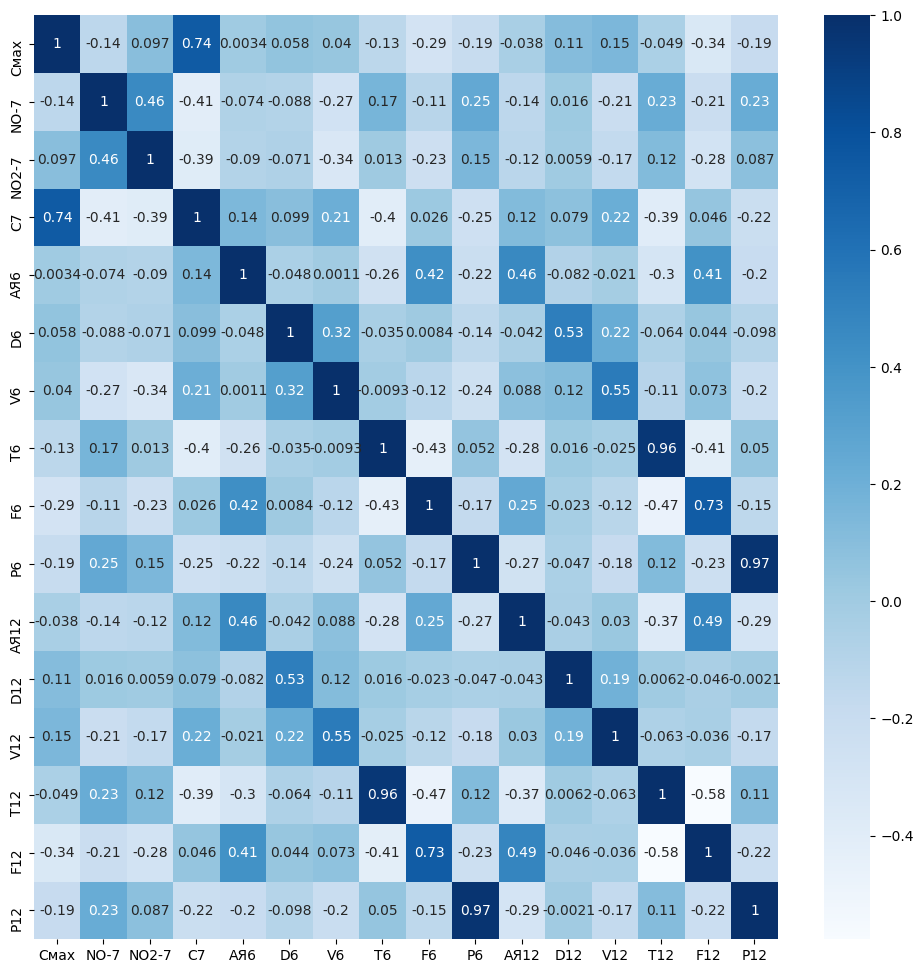

In [7]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(dfd.corr(), annot=True, cmap='Blues', ax=ax);
plt.show()

In [8]:
#sns.pairplot(dfd)

### Подготовка данных
Выделим из датафрейма данные для регрессии:  
$X$ — все столбцы, кроме последнего,  
$Y$ — последний столбец.

In [9]:
#X = df.iloc[:,4:13]
#X = df.iloc[:,[4,5,6,7,9,11,16]] 
X = df.iloc[:,[4,5,6,8,10,15]] 
y = df.iloc[:,3]         

In [10]:
X.columns.tolist()

['NO-7', 'NO2-7', 'C7', 'D6', 'T6', 'V12']

In [11]:
X.tail()

,NO-7,NO2-7,C7,D6,T6,V12
501,2.90,7.35,68.81,350,2.6,2
502,29.91,57.33,41.81,250,6.9,2
503,2.07,18.77,91.71,240,9.3,4
509,1.59,18.30,65.62,10,8.6,2
510,1.50,22.20,70.95,60,9.0,2


Разобьем датасет на данные для обучения и тестирования. Для этого воспользуемся функцией *train_test_split*() библиотеки *Scikit-learn*.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Стандартизируем данные с помощью
*sklearn.preprocessing.StandardScaler*()

$z = (x - u) / s$

$u$ — среднее значение, $s$ — стандартное отклонение.

### Построение моделей

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

### Оценка и сравнение моделей

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.51 		 110.40 	8.13 		0.78
LassoRegression 	 10.94 		 119.76 	8.65 		0.76
RidgeRegression 	 10.53 		 110.79 	8.15 		0.78


### Сравнение коэффициентов моделей

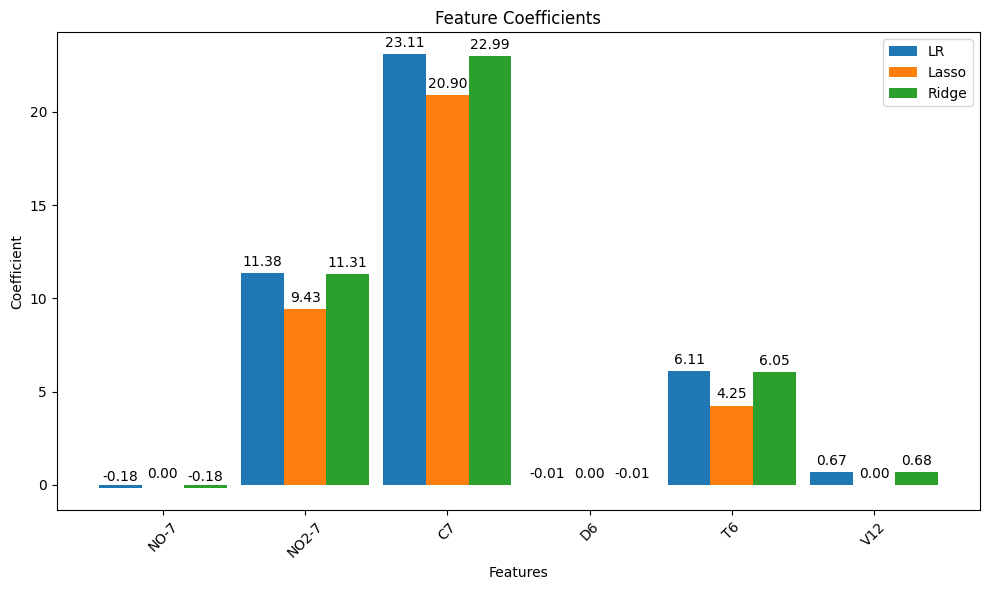

In [16]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

#labels = new_columns[:-1]
labels = X.columns.tolist()

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

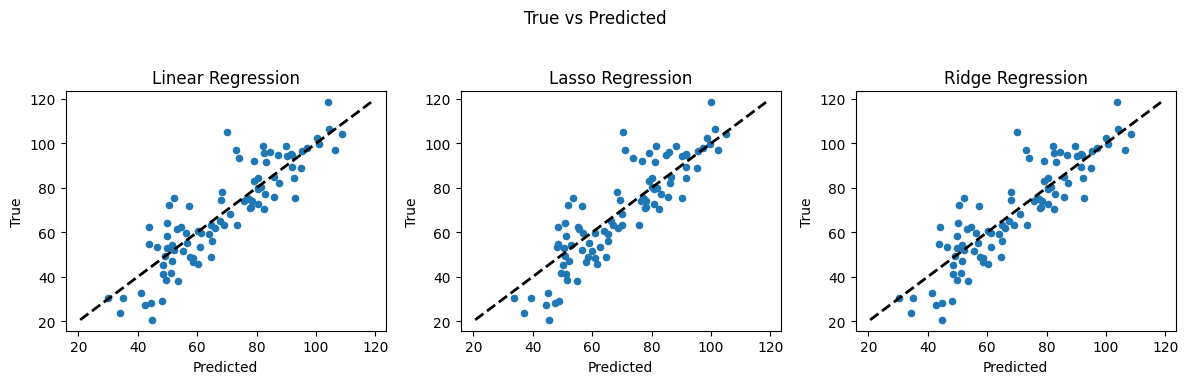

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Дерево решений

На каждом узле дерева решений - вопрос:
Какой признак позволит разделить значения таким образом, что результирующие группы будут максимально отличаться друг от друга, а члены каждой результирующей подгруппы будут максимально похожи друг на друга?  
[ссылка](https://nuancesprog.ru/p/6160/)

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 13.91 		 193.36 		10.34 		0.61


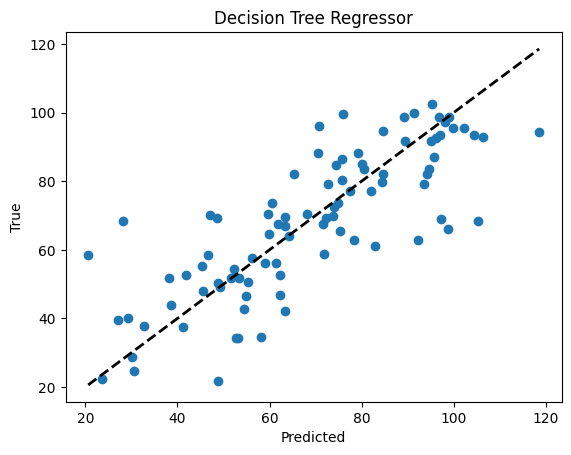

In [18]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

### Random forest (случайный лес) 
Случайный лес состоит из большого количества отдельных деревьев решений, которые работают как ансамбль методов.  
Большое число относительно некоррелированных деревьев, работающих совместно, будет превосходить любую из их отдельных составляющих.  
[ссылка](https://nuancesprog.ru/p/6160/)

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 9.64 		 93.00 		7.36 		0.81


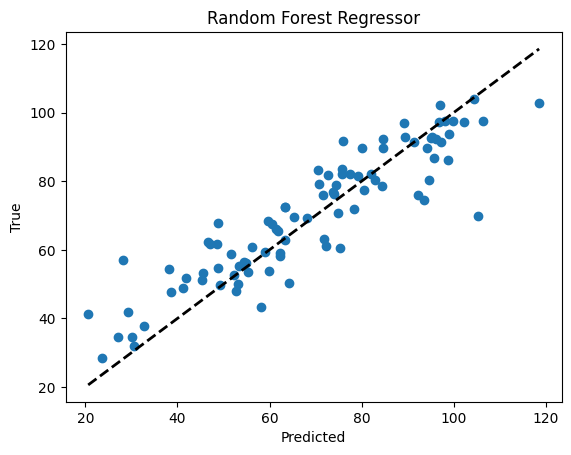

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

Влияние факторов

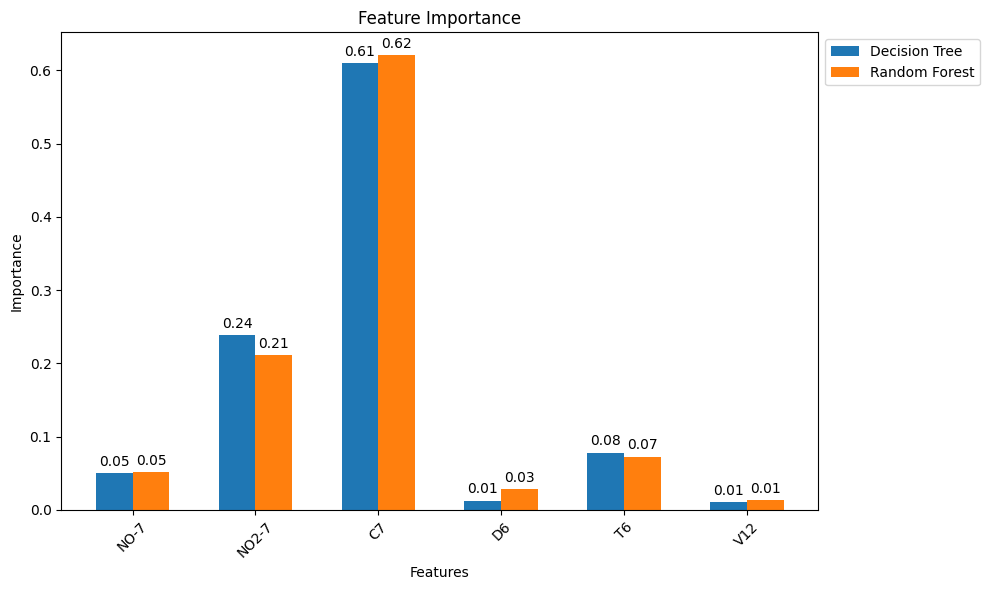

In [20]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

#labels = new_columns[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

### Сравнение всех рассмотренных алгоритмов
Сравнение по *Root Mean Squared Error* (RMSE) — это корень из ошибки MSE.

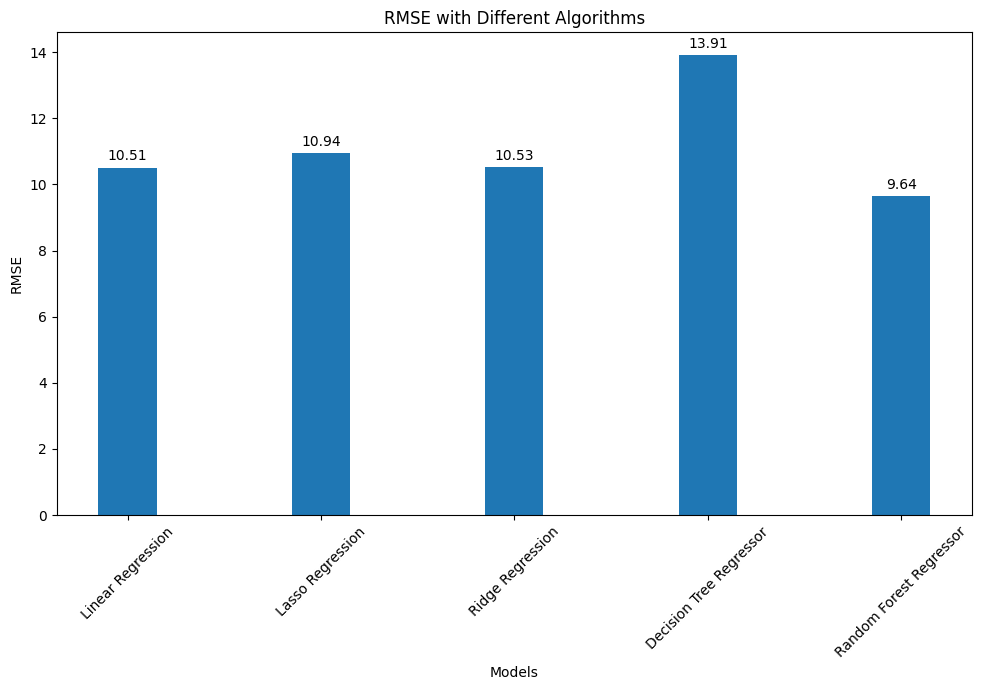

In [21]:
models = [lr, lasso, ridge, dtr, rfr]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr =  GradientBoostingRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print(""" Gradient Boosting Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(" Gradient Boosting Regressor")
plt.show()

<center>
<img align="center" src="mmet_thanks.png">
</center>